# NY CitiBike Analysis: Dashboards with Streamlit

## Import Packages and Load Data

In [1]:
# Import packages
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static
import kaleido

/opt/anaconda3/envs/venv_divvy/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
# Load data
df = pd.read_csv('subset_new_york_data.csv', index_col = 0)

In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
value                   int64
bike_rides_daily        int64
dtype: object

In [4]:
df.shape

(30689, 17)

## Wrangle Data

In [5]:
# Create a month column 
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['month'] = df['date'].dt.month
df['month'] = df['month'].astype('int')

In [6]:
# Create the season column
df['season'] = [
'winter' if (month == 12 or 1 <= month <= 4)
    else 'spring' if (4 < month <= 5)
    else 'summer' if (6 <= month <= 9)
    else 'fall'
for month in df['month']
    ]

In [7]:
df.shape

(30689, 19)

In [8]:
# Save the df with the added columns
df.to_csv('subset_new_york_data.csv')

## Create Plotly Bar Chart

In [9]:
# Groupby
df_groupby_bar = df.groupby('start_station_name', as_index = False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

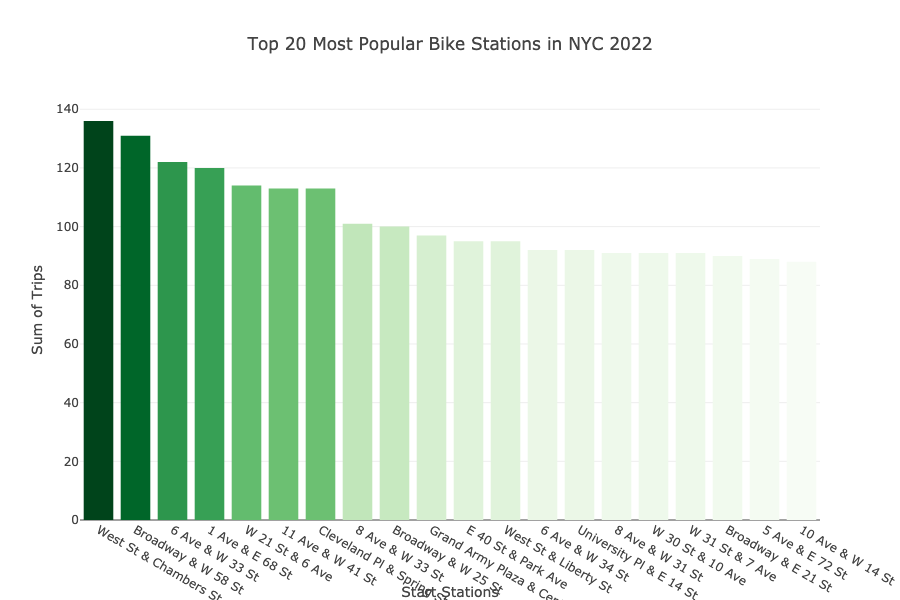

In [10]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value'], marker = {'color': top20['value'], 'colorscale': 'Greens'}))

fig.update_layout(
    title = 'Top 20 Most Popular Bike Stations in NYC 2022',
    xaxis_title = 'Start Stations',
    yaxis_title ='Sum of Trips',
    width = 900, height = 600
)

fig.show('png')

In [11]:
# Save the top 20 stations as a csv file 
top20.to_csv('top20.csv')

## Create Plotly Line Chart

/opt/anaconda3/envs/venv_divvy/lib/python3.12/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



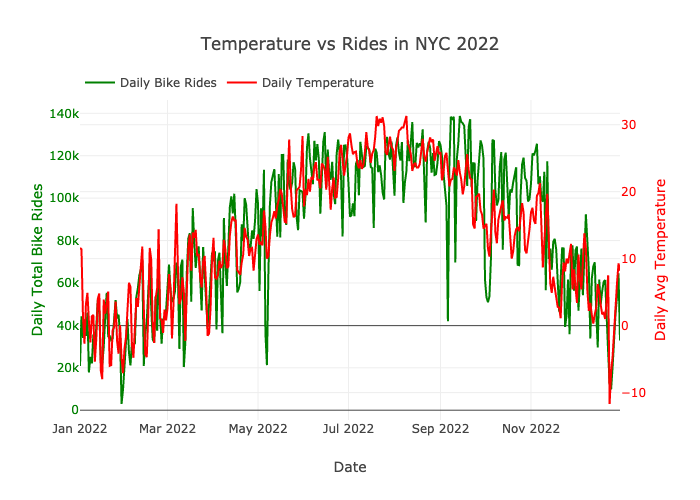

In [12]:
# Aggregate the data by datetime
df_aggregated = df.groupby('date').agg({
    'bike_rides_daily': 'mean',  # You can also use 'mean' or another aggregate function
    'avgTemp': 'mean'
}).reset_index()

# Create the figure
fig = go.Figure()

# Primary Y-axis (Bike rides)
fig.add_trace(
    go.Scatter(
        x = df_aggregated['date'],
        y = df_aggregated['bike_rides_daily'],
        name = 'Daily Bike Rides',
        yaxis = 'y1',  # Specify primary y-axis
        line = dict(color = 'green')  # Set the color for bike rides
    )
)

# Secondary Y-axis (Avg Temp)
fig.add_trace(
    go.Scatter(
        x = df_aggregated['date'],
        y = df_aggregated['avgTemp'],
        name = 'Daily Temperature',
        yaxis = 'y2',  # Specify secondary y-axis
        line = dict(color = 'red')  # Set the color for average temperature
    )
)

# Customize the chart layout
fig.update_layout(
    title = 'Temperature vs Rides in NYC 2022',
    xaxis_title = 'Date',
    yaxis = dict(
        title = 'Daily Total Bike Rides',
        titlefont = dict(color = 'green'),
        tickfont = dict(color = 'green')
    ),
    yaxis2 = dict(
        title = 'Daily Avg Temperature',
        titlefont = dict(color = 'red'),
        tickfont = dict(color = 'red'),
        anchor = 'x',
        overlaying = 'y',
        side = 'right'
    ),
    legend = dict(
        x = 0,
        y = 1.1,
        orientation = 'h'
    )
)

# Show the plot
fig.show('png')